In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [220]:
iris = load_iris()

In [221]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U7'), dtype('<U7')) -> dtype('<U7')

In [100]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [104]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [105]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [108]:
data.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


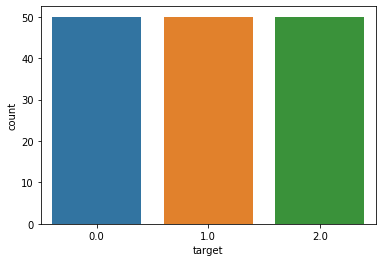

In [112]:
sns.countplot(data['target'])

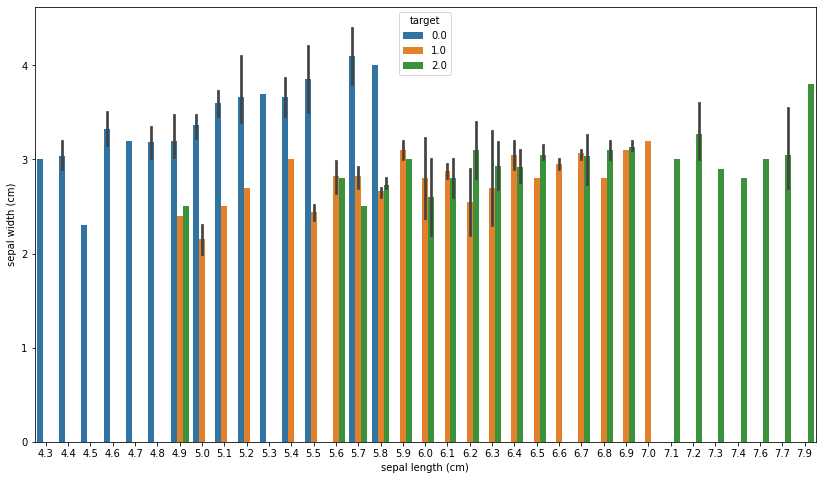

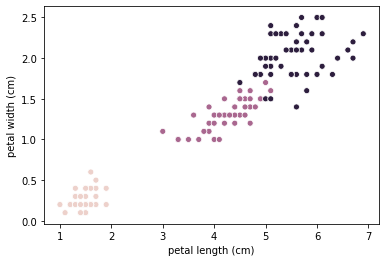

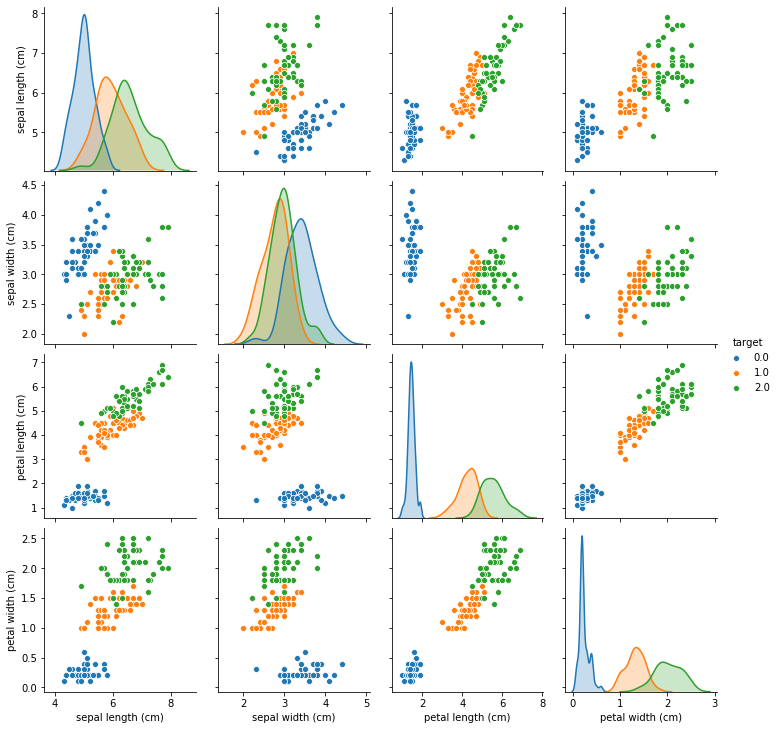

In [145]:
sns.pairplot(data,hue='target')

In [157]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
x_test.shape

(38, 4)

In [171]:
tree_pred = tree.predict(x_test)

In [179]:
from sklearn.metrics import accuracy_score
tree_acc = accuracy_score(y_test,tree_pred) *100
tree_acc

94.73684210526315

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

0.9736842105263158

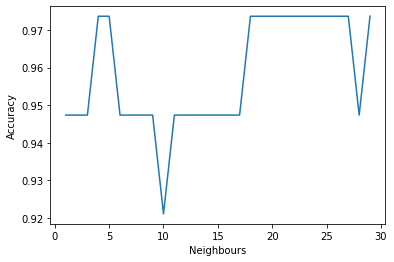

In [189]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
for i in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=i)
    
    clf.fit(X_train,y_train.ravel())
    k_pred = clf.predict(X_test)
    knn = accuracy_score(y_test, k_pred)
    acc.append(knn)
knn_acc = np.array(acc).max()
plt.plot(range(1,30),acc)
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
knn_acc

In [213]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(x_train,y_train)
sv_pred = sv_clf.predict(x_test)
sv_acc = accuracy_score(y_test,sv_pred) *100
sv_acc

100.0

In [193]:
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test,tree_pred)
knn_cm = confusion_matrix(y_test,k_pred)


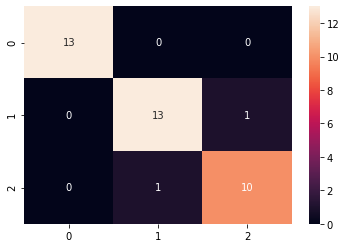

In [195]:
sns.heatmap(tree_cm,annot=True)

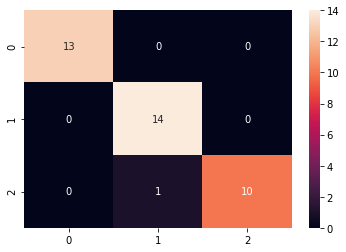

In [215]:
sns.heatmap(knn_cm,annot=True)

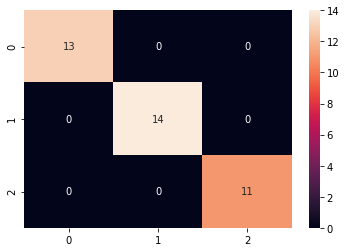

In [217]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True)

Text(0, 0.5, 'true positive')

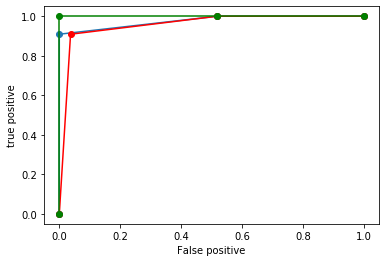

In [218]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, k_pred, pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, tree_pred, pos_label=2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, sv_pred, pos_label=2)
plt.plot(fpr,tpr,marker='o')
plt.plot(fpr2,tpr2,c='red',marker='o')
plt.plot(fpr3,tpr3,c='green',marker='o')
plt.xlabel('False positive')
plt.ylabel('true positive')